In [1]:
from ultralytics import YOLO
from imageai.Detection import ObjectDetection
import os 
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import plot_model
import tensorflow.image as tfi
import random
import cv2
from PIL import Image
import sklearn
import seaborn as sbe

In [2]:
import tifffile as tiff
# Path to the directory containing TIFF files
directory = "data/images"
input_data_images=[]
# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".tif") or filename.endswith(".tiff"):
        file_path = os.path.join(directory, filename)

        # Load the TIFF file using tifffile
        try:
            input_data_images.append (np.array(tiff.imread(file_path))) 
        except Exception as e:
            print(f"Failed to load {filename}: {e}")


In [3]:
import glob  # To find files matching a pattern
import os    # For file path operations and deleting files
from PIL import Image  # To open and process images
import numpy as np  # To convert images to NumPy arrays
import re
# Path to the directory containing images
directory = "data/labels"
segmentation_labels = []
## this is used for the numerical ordering in the files name not by the string ordering 
def natural_key(file_name):
    return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', file_name)]

image_files = sorted(glob.glob(os.path.join(directory, '*.[pjJ][npN]*[gG]*')), key=natural_key)
# Load and process each image
for file_path in image_files:
    try:
        # Check if the filename contains an underscore
        if "_" in os.path.basename(file_path):
            os.remove(file_path)  # Remove the file if it contains an underscore    
        else:
            # Open the image, convert to NumPy array, and append to the list
            image = Image.open(file_path)
            segmentation_labels.append(np.array(image))
            print(file_path)
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

data/labels\0.png
data/labels\1.png
data/labels\2.png
data/labels\3.png
data/labels\4.png
data/labels\5.png
data/labels\6.png
data/labels\7.png
data/labels\8.png
data/labels\9.png
data/labels\10.png
data/labels\11.png
data/labels\12.png
data/labels\13.png
data/labels\14.png
data/labels\15.png
data/labels\16.png
data/labels\17.png
data/labels\18.png
data/labels\19.png
data/labels\20.png
data/labels\21.png
data/labels\22.png
data/labels\23.png
data/labels\24.png
data/labels\25.png
data/labels\26.png
data/labels\27.png
data/labels\28.png
data/labels\29.png
data/labels\30.png
data/labels\31.png
data/labels\32.png
data/labels\33.png
data/labels\34.png
data/labels\35.png
data/labels\36.png
data/labels\37.png
data/labels\38.png
data/labels\39.png
data/labels\40.png
data/labels\41.png
data/labels\42.png
data/labels\43.png
data/labels\44.png
data/labels\45.png
data/labels\46.png
data/labels\47.png
data/labels\48.png
data/labels\49.png
data/labels\50.png
data/labels\51.png
data/labels\52.png
dat

In [4]:
for i in segmentation_labels[:5]:
    print(i.shape)
for i in input_data_images[:1]:
    print(i)
print(len(segmentation_labels))
print(np.array(segmentation_labels).shape)
print(np.array(input_data_images).shape)
print(len(input_data_images))

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
[[[131  48  73 ... 316  80   0]
  [142  41  74 ... 316  80   0]
  [142  50  88 ... 317  30   0]
  ...
  [276 234 451 ... 256  10   0]
  [276 241 479 ... 250  10   0]
  [269 230 416 ... 247  10   0]]

 [[173 115 243 ... 320  80   0]
  [153 105 214 ... 321  80   0]
  [153 116 215 ... 323  10   0]
  ...
  [332 307 504 ... 247  10   0]
  [332 271 503 ... 242  10   0]
  [308 249 453 ... 239  10   0]]

 [[173 134 295 ... 326  10   0]
  [153 165 321 ... 326  10   0]
  [153 191 342 ... 328  10   0]
  ...
  [332 384 565 ... 232  10   0]
  [332 371 528 ... 228  10   0]
  [308 336 537 ... 226  10   0]]

 ...

 [[113 108 275 ... 367  10   0]
  [117  86 239 ... 370  10   0]
  [117  82 232 ... 374  10   0]
  ...
  [239 395 587 ... 240  10   0]
  [239 231 418 ... 237  10   0]
  [179 152 333 ... 234  10   0]]

 [[113 114 266 ... 368  10   0]
  [117 120 283 ... 371  10   0]
  [117 107 266 ... 375  10   0]
  ...
  [239 240 409 ... 230  10   0]
  [23

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaled_input_data_images = []

for image_array in input_data_images:
    # Get the original shape of the image
    original_shape = image_array.shape

    # Reshape the image to 2D (pixels x channels)
    reshaped_array = image_array.reshape(-1, original_shape[-1])

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data
    scaled_array = scaler.fit_transform(reshaped_array)

    # Reshape back to the original dimensions
    scaled_image = scaled_array.reshape(original_shape)

    # Append the scaled image to the list
    scaled_input_data_images.append(scaled_image)

# Print the number of scaled images
print(len(scaled_input_data_images))
print(scaled_input_data_images[0])


306
[[[    0.22587    0.086957     0.06812 ...     0.62069       0.875           0]
  [     0.2471    0.078947    0.069028 ...     0.62069       0.875           0]
  [     0.2471    0.089245    0.081744 ...       0.625        0.25           0]
  ...
  [    0.50579     0.29977     0.41144 ...     0.36207           0           0]
  [    0.50579     0.30778     0.43688 ...     0.33621           0           0]
  [    0.49228     0.29519     0.37965 ...     0.32328           0           0]]

 [[    0.30695     0.16362     0.22252 ...     0.63793       0.875           0]
  [    0.26834     0.15217     0.19619 ...     0.64224       0.875           0]
  [    0.26834     0.16476     0.19709 ...     0.65086           0           0]
  ...
  [     0.6139      0.3833     0.45958 ...     0.32328           0           0]
  [     0.6139     0.34211     0.45867 ...     0.30172           0           0]
  [    0.56757     0.31693     0.41326 ...     0.28879           0           0]]

 [[    0.30695     0

In [33]:
import numpy as np

def dividing_data(ds, val_size=0.1, test_size=0.1, train_size=0.8):
    # Ensure the total size adds up to 1
    assert val_size + test_size + train_size == 1.0, "Sizes must sum to 1."

    # Shuffle the dataset
    np.random.shuffle(ds)

    # Calculate lengths
    total_len = len(ds)
    train_len = int(total_len * train_size)
    test_len = int(total_len * test_size)
    
    # Split the data
    train_data = ds[:train_len]
    test_data = ds[train_len:train_len + test_len]
    val_data = ds[train_len + test_len:]

    return train_data, test_data, val_data

# Example usage with your data
train_input_data_images, test_input_data_images, val_input_data_images = dividing_data(scaled_input_data_images)
print("Test set length:", len(test_input_data_images))

train_segmentation_labels, test_segmentation_labels, val_segmentation_labels = dividing_data(segmentation_labels)


Test set length: 30


In [7]:


def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce_loss + dice


## Preparing the model

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Activation, Input, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class SegmentationDatasetFromNumpy(Dataset):
    def __init__(self, data, masks, transform=None):
        self.data = data  # Shape: (244, 128, 128, 12)
        self.masks = masks  # Shape: (244, 128, 128)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get image and mask
        image = self.data[idx].astype(np.float32)  # Convert to float32
        mask = self.masks[idx].astype(np.float32)  # Convert to float32 (if required)

        # Convert to torch tensors
        image = torch.tensor(image).permute(2, 0, 1)  # Convert to (12, 128, 128)
        mask = torch.tensor(mask).unsqueeze(0)  # Convert to (1, 128, 128) for binary segmentation

        # Apply transformations if any
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


dataset = SegmentationDatasetFromNumpy(train_input_data_images, train_segmentation_labels)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


In [26]:
import segmentation_models_pytorch as smp

# Load DeepLabV3 with ResNet34 backbone and modify for 12 channels
model = smp.DeepLabV3(
    encoder_name="resnet34",        # Use a pretrained ResNet34 backbone
    encoder_weights="imagenet",     # Use ImageNet weights for the encoder
    in_channels=12,                 # Modify to handle 12-channel input
    classes=1,                      # 1 output class for binary segmentation
)

# Print model summary
print(model)


DeepLabV3(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(12, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [27]:
import torch
import torch.optim as optim

# Loss function and optimizer
loss_fn = smp.losses.DiceLoss('binary')  # Dice loss for binary segmentation
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for images, masks in dataloader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = loss_fn(outputs, masks)
        epoch_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(dataloader):.4f}")


Epoch [1/10], Loss: 0.6458
Epoch [2/10], Loss: 0.5707
Epoch [3/10], Loss: 0.5421
Epoch [4/10], Loss: 0.5064
Epoch [5/10], Loss: 0.5017
Epoch [6/10], Loss: 0.4625
Epoch [7/10], Loss: 0.4504
Epoch [8/10], Loss: 0.4284
Epoch [9/10], Loss: 0.4126
Epoch [10/10], Loss: 0.4046


In [49]:
# Convert to PyTorch tensor and ensure it's float type
test_tensor_image = torch.tensor(test_input_data_images, dtype=torch.float32)  # Use float32
# Change the order of dimensions if necessary (to (30, 12, 128, 128))
test_tensor_image = test_tensor_image.permute(0, 3, 1, 2)  # Shape: (30, 12, 128, 128)
test_masks_tensor = torch.tensor(test_segmentation_labels, dtype=torch.float32)  # Shape: (30, 128, 128)

In [45]:
# Make predictions
with torch.no_grad():  # Disable gradient calculation for inference
    outputs = model(test_tensor_image)  # Get model outputs
    predictions = (torch.sigmoid(outputs) > 0.5).float()  # Apply sigmoid and threshold to get binary predictions

# Convert predictions to NumPy array
predictions_np = predictions.numpy()  # Shape will be (200, 1, 128, 128)
# Post-process predictions (remove channel dimension)
predictions_np = predictions_np.squeeze(1)  # Shape: (30, 128, 128)

In [46]:
def calculate_iou(predictions, masks):
    smooth = 1e-6  # To avoid division by zero
    predictions = predictions.view(-1)
    masks = masks.view(-1)

    intersection = (predictions * masks).sum()
    union = predictions.sum() + masks.sum() - intersection

    iou = (intersection + smooth) / (union + smooth)
    return iou.item()

def calculate_dice(predictions, masks):
    smooth = 1e-6  # To avoid division by zero
    predictions = predictions.view(-1)
    masks = masks.view(-1)

    intersection = (predictions * masks).sum()
    dice = (2. * intersection + smooth) / (predictions.sum() + masks.sum() + smooth)
    return dice.item()


In [51]:
print("Test Images Shape:", test_tensor_image.shape)  # Should be (30, 12, 128, 128)
print("Test Masks Shape:", test_masks_tensor.shape)    # Should be (30, 128, 128)

Test Images Shape: torch.Size([30, 12, 128, 128])
Test Masks Shape: torch.Size([30, 128, 128])


In [53]:
model.eval()
total_iou = 0
total_dice = 0
total_samples = test_tensor_image.size(0)  # Number of samples
with torch.no_grad():
    # Make predictions
    outputs = model(test_tensor_image)
    predictions = (torch.sigmoid(outputs) > 0.5).float()  # Apply sigmoid and threshold

    # Calculate metrics for all samples
    for i in range(total_samples):
        total_iou += calculate_iou(predictions[i], test_masks_tensor[i])
        total_dice += calculate_dice(predictions[i], test_masks_tensor[i])
# Average metrics
average_iou = total_iou / total_samples
average_dice = total_dice / total_samples

print(f"Average IoU: {average_iou:.4f}")
print(f"Average Dice Coefficient: {average_dice:.4f}")


Average IoU: 0.2844
Average Dice Coefficient: 0.3284


In [54]:
import torch
import numpy as np

# Assume test_images_tensor and test_masks_tensor are already defined
# and model is already trained.

model.eval()
total_correct = 0
total_pixels = 0
total_samples = test_tensor_image.size(0)  # Number of samples

with torch.no_grad():
    outputs = model(test_tensor_image)
    predictions = (torch.sigmoid(outputs) > 0.5).float()  # Apply sigmoid and threshold

    for i in range(total_samples):
        # Count correct predictions
        total_correct += (predictions[i] == test_masks_tensor[i]).sum().item()  # Count correct pixels
        total_pixels += test_masks_tensor[i].numel()  # Total pixels in the mask

# Calculate pixel accuracy
pixel_accuracy = total_correct / total_pixels if total_pixels > 0 else 0

print(f"Test Pixel Accuracy: {pixel_accuracy:.4f}")



Test Pixel Accuracy: 0.5722


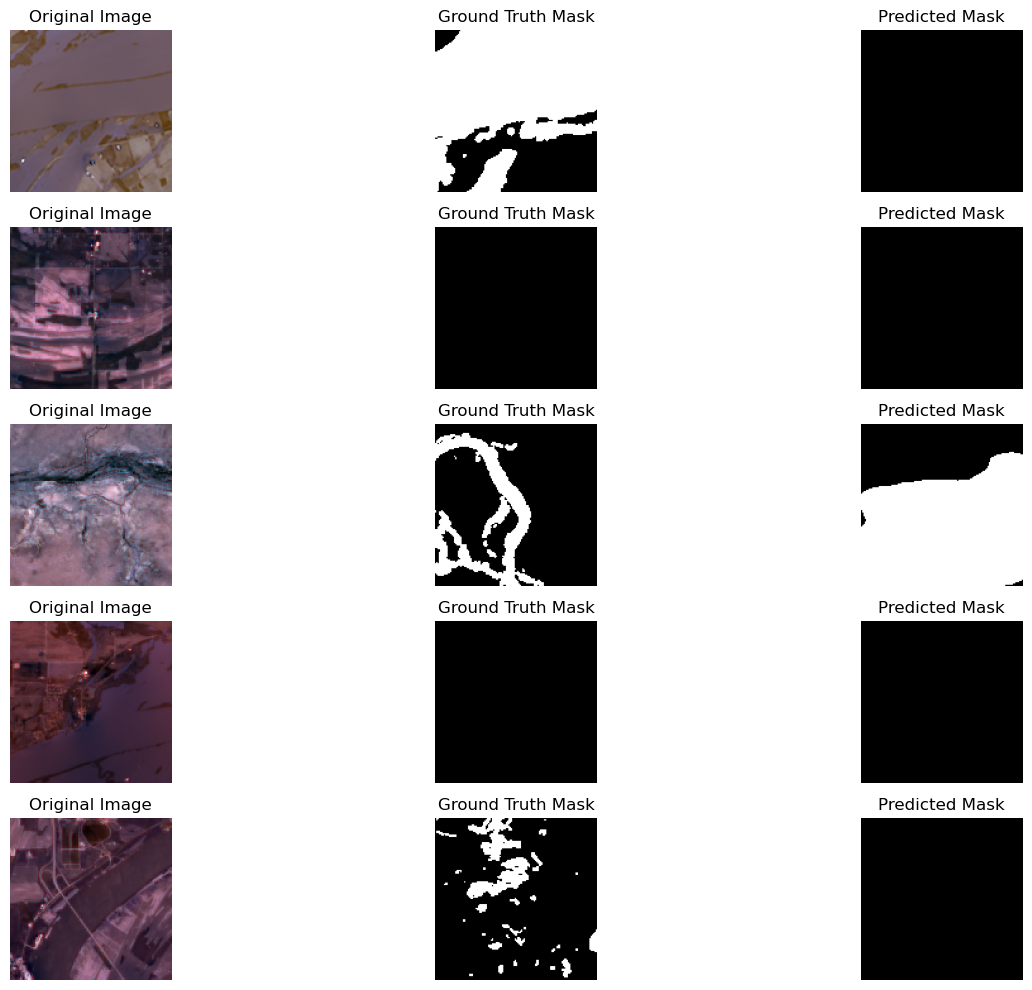

In [60]:
import matplotlib.pyplot as plt

# Function to visualize predictions
def display_predictions(images, masks, predictions, num_samples=5):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        # Original Image
        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(images[i, :3, :, :].cpu().numpy().transpose(1, 2, 0))  # Adjust dimensions if needed
        plt.title("Original Image")
        plt.axis("off")

        # Ground Truth Mask
        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(masks[i].cpu().numpy().squeeze(), cmap='gray')  # Adjust for color map
        plt.title("Ground Truth Mask")
        plt.axis("off")

        # Predicted Mask
        plt.subplot(num_samples, 3, i * 3 + 3)
        plt.imshow(predictions[i].cpu().numpy().squeeze(), cmap='gray')  # Adjust for color map
        plt.title("Predicted Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Assuming you have the following tensors
# test_images_tensor, test_masks_tensor, and predictions
# Call the function to display predictions
display_predictions(test_tensor_image, test_masks_tensor, predictions)

